## Filters

* https://paper.dropbox.com/doc/Filters-LjzoItIJBBvGoTnI8TF8j

In [173]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
DATA_DIR = '../data/'
img_fpath = os.path.join(DATA_DIR, 'volleyball_frame_00665.png')
img_fpath2 = str(Path(DATA_DIR, 'segmentation', 'headshot.jpg'))
FIGSIZE=(6,6)

In [184]:
def plot_img(arr, fs=FIGSIZE, cmap='gray', title=None):
    plt.figure(figsize=fs)
    plt.imshow(arr, cmap=cmap)
    plt.title(title)
    plt.show()

def load_cv2_img(fpath, w=None, h=None, colorspace=None):
    img = cv2.imread(fpath)
    if colorspace is not None:
        img = cv2.cvtColor(img, colorspace)
    if None not in [w,h]:
        img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    return img

## Kernels / Filters

* Kernel is a matrix of coefficients used to "transform" an image or extract features
* Applied as elementwise multiplication followed by a sum
* Steps:
    1. Take two matrices (filter + image patch)
    2. Multiply (not dot-product)
    3. Sum the elements
* http://setosa.io/ev/image-kernels/
* https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/filter_2d/filter_2d.html
* https://stackoverflow.com/questions/46106321/how-can-avoid-including-zeros-when-using-the-opencv-filter2d-function

In [185]:
identity = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
brighten = np.array([
    [0, 0, 0],
    [0, 2, 0],
    [0, 0, 0]
])
darken = np.array([
    [0, 0, 0],
    [0, .5, 0],
    [0, 0, 0]
])
avg_blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9
gaussian_blur = np.array([
    [.08, .12, .08],
    [.12, .19, .12],
    [.08, .12, .08],
])
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [1, -1, 1]
]) / 2

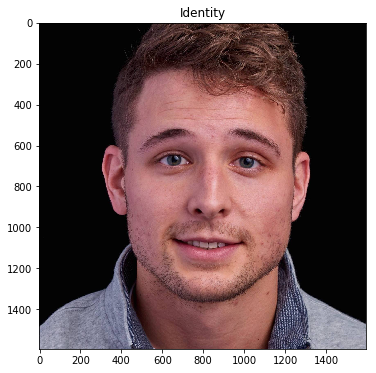

In [186]:
# Identity
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
img = cv2.filter2D(img, -1, identity)
plot_img(img, title="Identity")

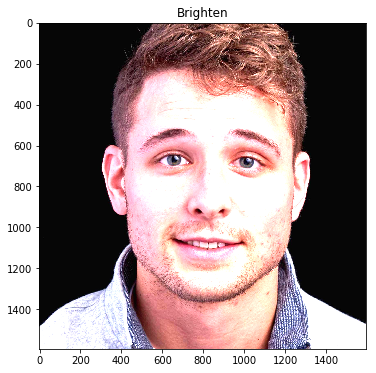

In [187]:
# Brighten
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
bright = cv2.filter2D(img, -1, brighten)
plot_img(bright, title="Brighten")

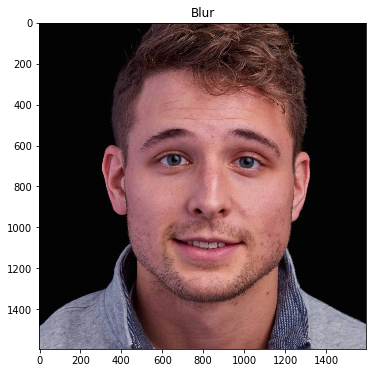

In [188]:
# Averaging Blur
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
blurred = cv2.filter2D(img, -1, avg_blur)
plot_img(blurred, title="Blur")

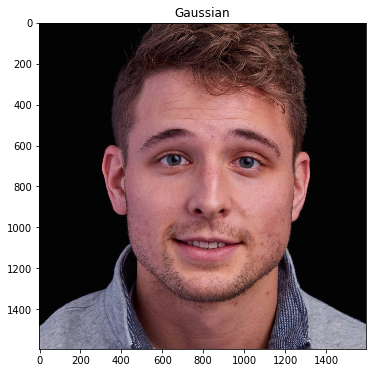

In [189]:
# Gaussian Blur
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
blurred = cv2.filter2D(img, -1, gaussian_blur)
plot_img(blurred, title="Gaussian")

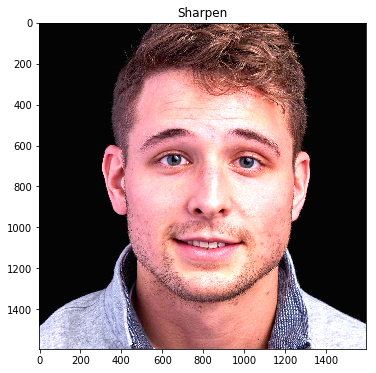

In [190]:
# Sharpen
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
sharp = cv2.filter2D(img, -1, sharpen)
plot_img(sharp, title="Sharpen")

## Convolution vs Correlation

* Both are element-wise multiplication of two matrices followed by a sum
* But the order in which the filter is applied is reversed
* For symmetric filters, there is no difference
* https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
* https://docs.gimp.org/en/plug-in-convmatrix.html

* Convolution
![](https://docs.gimp.org/en/images/filters/examples/convolution-calculate.png)